In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

##Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [4]:
df = pd.read_csv("BIKE DETAILS.CSV")

In [5]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [7]:
df.head(10) #display its first 10 rows.

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


#Check for missing values in all columns and describe your approach for handling them. 

In [9]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [10]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [11]:
df['ex_showroom_price'].describe()



count    6.260000e+02
mean     8.795871e+04
std      7.749659e+04
min      3.049000e+04
25%      5.485200e+04
50%      7.275250e+04
75%      8.703150e+04
max      1.278000e+06
Name: ex_showroom_price, dtype: float64

#Using mean we replaced the missing value in the ex show room column .

In [25]:
mean_price = df['ex_showroom_price'].mean()
df['ex_showroom_price'].fillna(mean_price, inplace=True)   

In [26]:
mean_price

np.float64(87958.71239396794)

In [27]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [28]:
df['ex_showroom_price'] = df['ex_showroom_price'].round(2)

In [29]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87958.71
1,Honda Dio,45000,2017,Individual,1st owner,5650,87958.71
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.00
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.00
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,87958.71
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.00
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.00
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.00
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.00


In [30]:
#Q.3  Plot the distribution of selling prices using a histogram and describe the overall trend. 

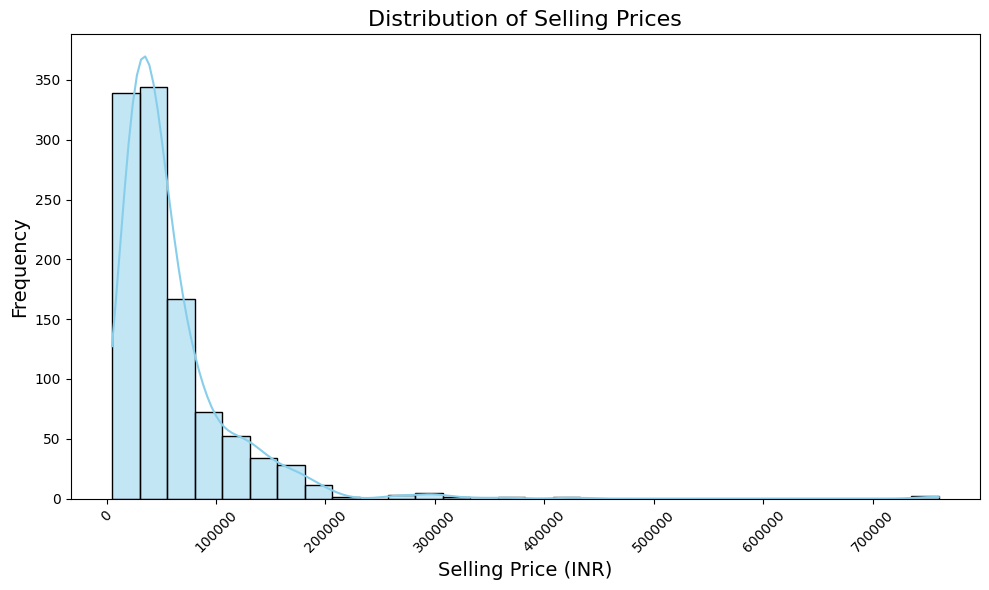

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')


plt.title('Distribution of Selling Prices', fontsize=16)
plt.xlabel('Selling Price (INR)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#The histogram will likely show a right-skewed distribution, meaning most vehicles are priced in the lower-to-mid range

#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation

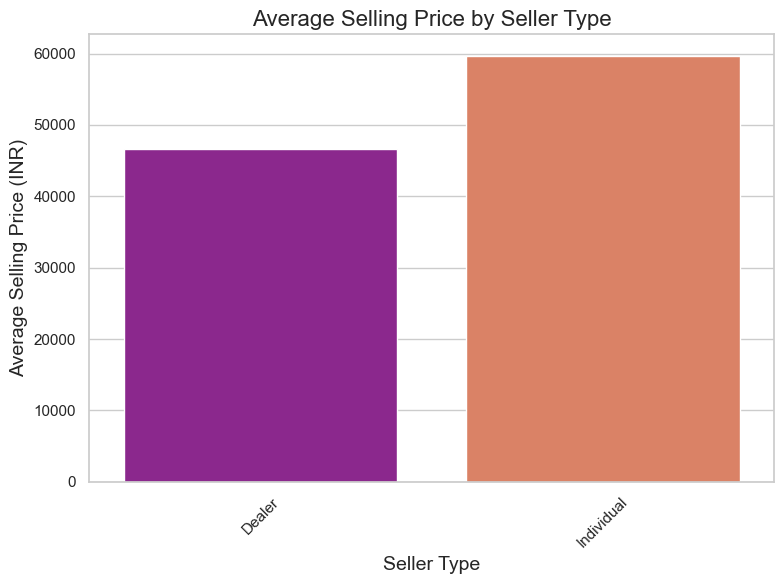

In [32]:
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='plasma')


plt.title('Average Selling Price by Seller Type', fontsize=16)
plt.xlabel('Seller Type', fontsize=14)
plt.ylabel('Average Selling Price (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##Individual have the highest average selling price, indicating they likely deal in certified or premium vehicles

#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot. 

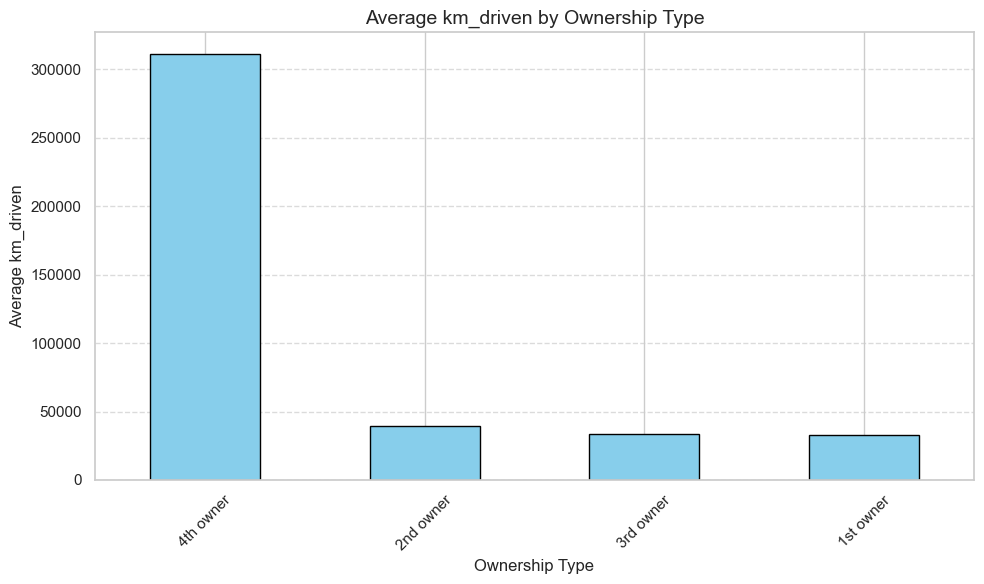

In [40]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_km_by_owner.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average km_driven by Ownership Type', fontsize=14)
plt.xlabel('Ownership Type', fontsize=12)
plt.ylabel('Average km_driven', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics. 

In [48]:
df['km_driven'].describe()  #Before removing outliers

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [49]:
df['km_driven'].describe()


Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]




In [50]:
df_cleaned['km_driven'].describe() #After removing outliers

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price. 

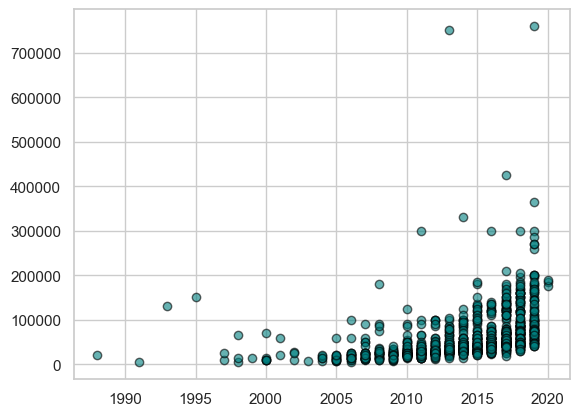

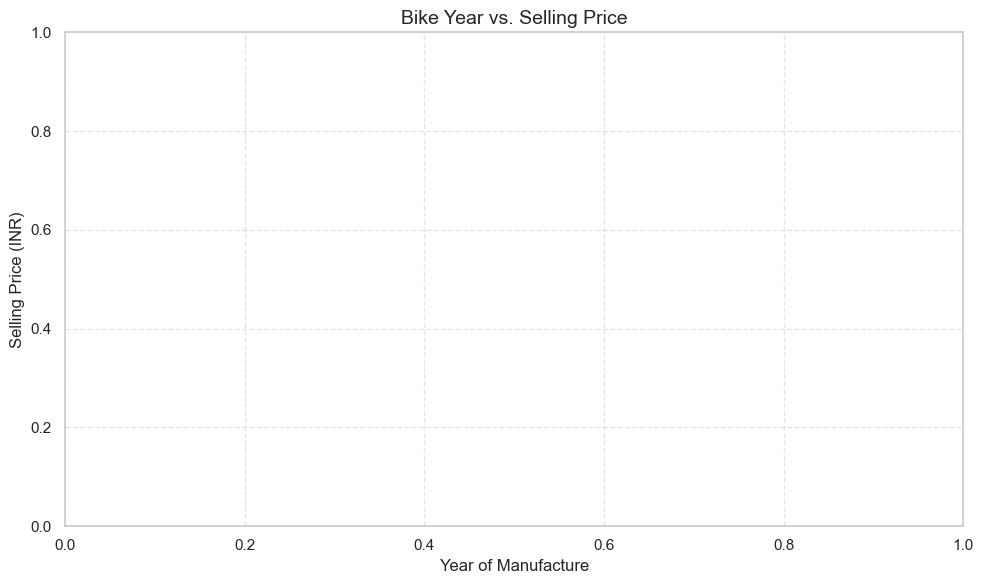

In [51]:

plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='teal', edgecolors='black')
plt.figure(figsize=(10, 6))

plt.title('Bike Year vs. Selling Price', fontsize=14)
plt.xlabel('Year of Manufacture', fontsize=12)
plt.ylabel('Selling Price (INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


plt.show()



#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame. 

In [52]:
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller', drop_first=False)


df_encoded.head(5)



,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,87958.71,False,True
1,Honda Dio,45000,2017,1st owner,5650,87958.71,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.00,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.00,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,87958.71,False,True


#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most? 

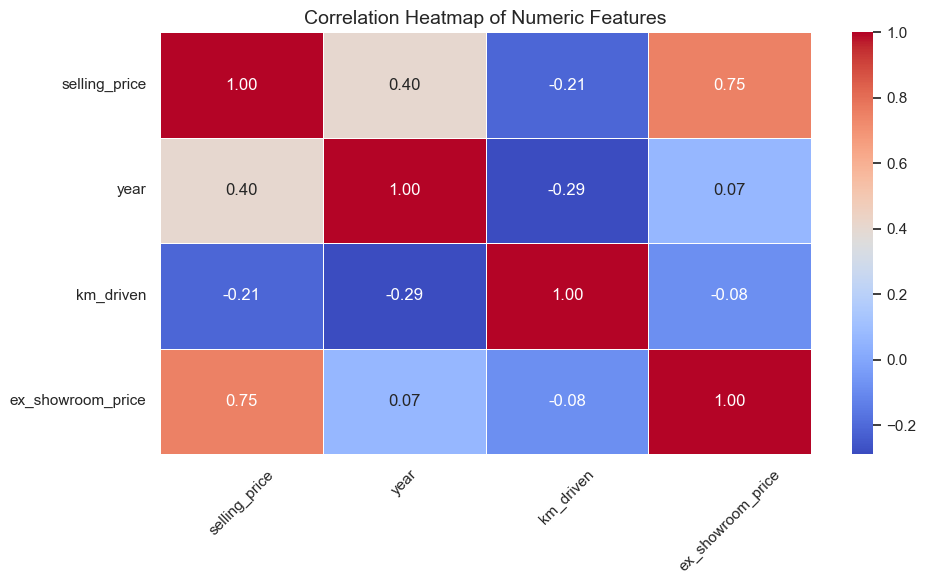

In [53]:

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='white')

plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

#Question 10: Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price?


#Answer :-  	Strong Positive Correlations (close to +1)
###These indicate that as one variable increases, the other tends to increase too.
• 	Example:  vs.  — likely a high correlation, since showroom price sets the baseline.
• 	Strong Negative Correlations (close to –1)
These suggest that as one variable increases, the other tends to decrease.
• 	Example:  vs.  — more usage typically lowers resale value.
• 	Weak or No Correlation (close to 0)
These variables don’t have a linear relationship.
• 	Example:  (if encoded numerically) might show weak correlation unless it’s a strong signal in your market.

##Mention any data cleaning or feature engineering you performed. 4

## • 	Handled Missing Values
• 	Detected missing entries in  and imputed them using median values to preserve distribution.
• 	Removed Outliers
• 	Applied the IQR method to detect and remove extreme values in , improving model reliability.